In [7]:
import requests
import numpy as np
import pandas as pd
import io

In [2]:
url = 'http://ufdev.shef.ac.uk/uflobin/ufdexF1?Tfrom=2021-06-24T00:00:00&Tto=2021-06-24T23:59:59&aktion=CSV_show&bySensor=731&freqInMin=5&tok=generic'

Show raw data

In [3]:
response = requests.get(url)
lines = response.text.splitlines()
print('\n'.join(lines[:40]))


<pre>
# Urban.Flows.Observatory.Sheffield @ 2021-06-25 13:00:34.617695
# From: 2021-06-24T00:00:00 To: 2021-06-24T23:59:59
# Number of tables shown: 1


# Begin CSV table for pair S0027|731
# The Urban Flows Observatory Sheffield @ 2021-06-25 13:00:34.617695
# From: 2021-06-24T00:00:00
# To: 2021-06-24T23:59:59
# site.id: S0027
# site.longitude: -1.466588974 [deg]
# site.latitude: 53.37888502 [deg]
# site.address: Howard Street @ Hallam Square
# site.heightAboveSeaLevel: 80.0 [m]
# sensor.id: 731
# sensor.heightAboveGround: 3.0 [m]
# sensor.distanceToWall: 0.0 [m]
# sensor.family: eWatch
# sensor.upTime: 658 days
# sensor.detectors: airtemp, noise, CO, NO, relhum, NO2
# ColDescription: name / units / UCD / description / type / no-data-value 
# Column_1 / data.time / s / TIME_UTC_UNIX / Time in seconds since 1970.0, or UNIX time / utime / -32768
# Column_2 / data.sensor /  / ID_MAIN / Sensor ID (numerical values) / int / -32768
# Column_3 / data.CO / ppm / AQ_CO / Carbon Monoxide / flo

Parse CSV data

In [15]:
data = io.StringIO(response.text)
df = pd.read_csv(data, comment='#', skiprows=2, header=None)
df[0] = pd.to_datetime(df[0], utc=True, unit='s')
df = df.set_index([0, 1]).sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 72 entries, (2021-06-23 23:04:34+00:00, 731) to (2021-06-24 04:59:34+00:00, 731)
Data columns (total 6 columns):
2    72 non-null float64
3    72 non-null float64
4    72 non-null float64
5    72 non-null float64
6    72 non-null float64
7    72 non-null float64
dtypes: float64(6)
memory usage: 4.1 KB


In [16]:
df

,,2,3,4,5,6,7
0,1,,,,,,
2021-06-23 23:04:34+00:00,731,0.28,22.57,56.0,14.8,69.9,6.65
2021-06-23 23:09:34+00:00,731,0.30,22.21,54.0,14.8,69.9,8.36
2021-06-23 23:14:34+00:00,731,0.32,21.99,54.0,14.8,69.9,11.89
2021-06-23 23:19:34+00:00,731,0.31,21.15,52.0,14.7,69.9,8.33
2021-06-23 23:24:34+00:00,731,0.30,20.56,53.0,14.7,69.9,5.04
2021-06-23 23:29:34+00:00,731,0.30,20.92,52.0,14.7,70.3,2.97
2021-06-23 23:34:42+00:00,731,0.30,20.71,52.0,14.7,70.3,1.76
2021-06-23 23:39:34+00:00,731,0.29,20.05,53.0,14.7,70.3,1.04
2021-06-23 23:44:34+00:00,731,0.29,19.11,55.0,14.7,70.3,0.67


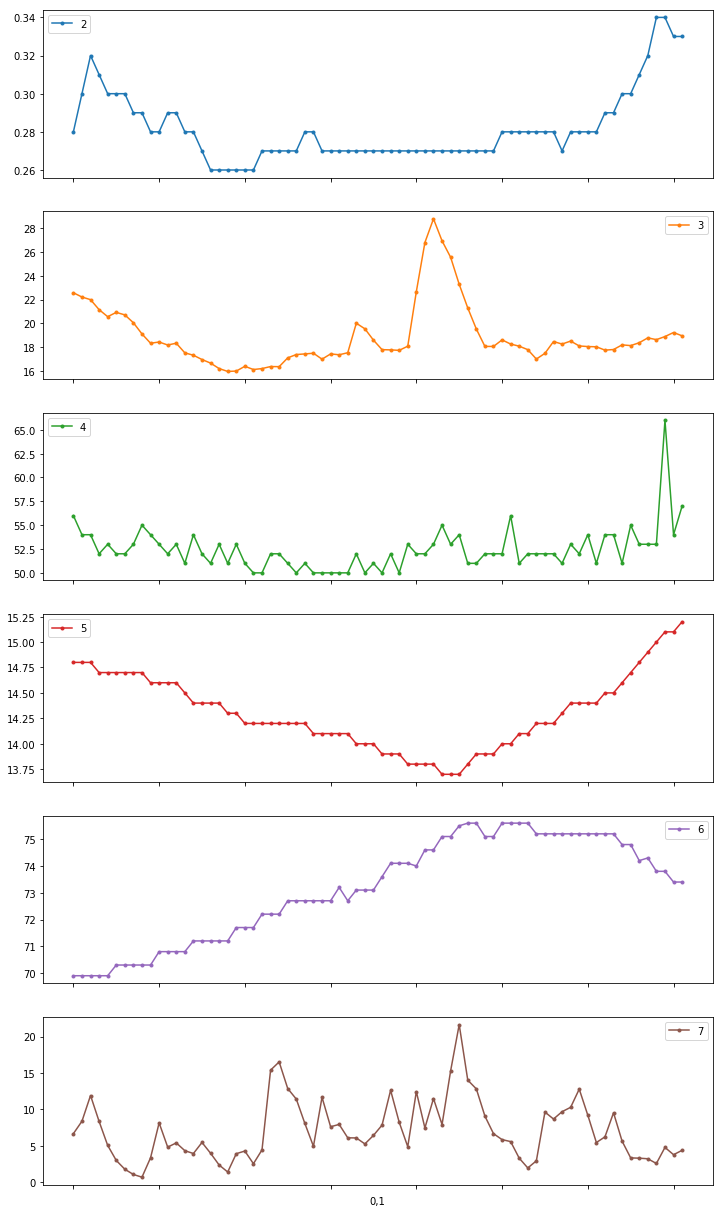

In [19]:
axes = df.plot(subplots=True, figsize=(12, len(df.columns)*4), style='.-')